<h1>PUNTO UNO<\h1>

a)

El sistema no posee fuerzas en X, y en Y posee la fuerza de la gravedad (mg) hacia abajo, y la normal de la barra (N) hacia arriba, en consecuencia haciendo sumatoria de fuerzas:

$m \ddot{x} = 0$

$m \ddot{y} = N-mg$

b)



c)

d)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

g = 9.81
L = 1
h = 0.1
t = np.linspace(1,100,100000)

def movimiento(theta, t):
    th, w = theta

    dthdt = w
    dwdt = (2*g/L - w**2*np.cos(th))*np.sin(th)/(1/3 + (np.sin(th))**2)

    return [dthdt,dwdt]

def integrator2(f, theta_0, t):
    h = t[1] - t[0]
    
    theta = np.zeros_like(t)
    w = np.zeros_like(t)
    
    theta[0] = theta_0[0]
    w[0] = theta_0[1]

    K1 = np.zeros(2)
    K2 = np.zeros(2)

    R = np.zeros(2)


    for i in range(1,len(t)):
            R = np.array([theta[i-1], w[i-1]])
            K1 = f(R,t[i-1])
            R = np.array([theta[i-1] + h*K1[0], w[i-1] + h*K1[1]])
            K2 = f(R, t[i-1]+h)

            theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
            w[i] = w[i-1] + 0.5*h*(K1[1]+K2[1])

    return theta, w


theta_0 = [np.deg2rad(10.), 0.]
theta, w = integrator2(movimiento, theta_0, t)

print(theta)

[0.17453293 0.17453752 0.1745513  ... 5.90028723 5.90243931 5.90457959]


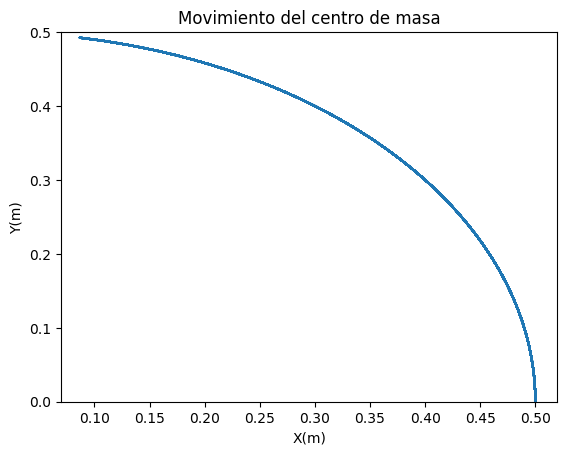

In [51]:
plt.figure(dpi=100)
plt.plot(L/2*np.sin(theta), L/2*np.cos(theta))
plt.xlim([0.07,0.52])
plt.ylim([0.,0.50])
plt.title("Movimiento del centro de masa")
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.show()


f)

In [54]:
i = 0
ang = 0
while ang < np.pi/2:
    ang = theta[i]
    i += 1

tiempo = round(t[i],3)

print("El tiempo que tarda la barra en caer es de: " + str(tiempo) +  " s")

    


El tiempo que tarda la barra en caer es de: 1.518 s
